# Python Catch-up Exam (DU, 08/06/2020): Car consumtion

> + **Due time** 15/06/2020
> + **Send your final notebook** at [romain.madar@cern.ch](mailto:romain.madar@cern.ch)
> 
> The final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this work takes into account mainly the correctness of the answers, but also the clarity of the explanations and the quality of the code.

## General informations


### A bit of context

Car consumption is a key element from many points of view (ecology, cost, fuel choice for a new car, ...). Most of the time, consumptions annouced by car constructors are not reflecting consumptions observed in real use-cases. The goal of this work is to analyze 280 car travels in order to estimate the real car consumption of the studied case, and understand how to possibly optimize it. The first part focuses on the analysis of the travels (distance, duration, etc...) while the second part focuses on the consumption.


### Data description

The data associated to the 280 car travels to be analyzed are provided *via* a `csv` file containings 7 informatios for each travel:
  1. `distance_Km`: travel distance [unit: kilometer],
  1. `conso_L100km`: averaged consomation of the travel [unit: Liter / 100 km]
  1. `duration_H`: duration of the travel [unit: hours, *e.g.* 0.3 means $60 \times 0.3 = 18\,$min]
  1. `price_EuroL`: price of the fuel for this travel [unit: Euros / Liter]
  1. `dayTime_H`: hour of the day at which the travel was done [number between 0 and 23)]
  1. `weekDay`: day of the week at which the travel was done [number between 1 (monday) and 7 (sunday)]
  1. `yearMonth`: month of the year at which the travel was done [number between 1 (january) and 12 (december)]
  
  

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [5]:
dayTime_Hdf = pd.read_csv('../data/CarData.csv')
df.head()

,distance_Km,conso_L100km,duration_H,price_EuroL,dayTime_H,weekDay,yearMonth
0,15.5,5.6,0.550000,1.34,7,1,2
1,12.4,4.5,0.216667,1.45,19,7,2
2,4.5,4.0,0.133333,1.45,18,7,2
3,0.4,11.7,0.033333,1.45,18,7,2
4,0.5,10.6,0.066667,1.45,11,7,2


## Part I : travel analysis (10 pts)

### 1. Average values (2 pts + 2 bonus pts)

 - what is the average traveled distance (in km)?

In [6]:
np.mean(df["distance_Km"])

16.659642857142856

 - what is the average travel duration (in minutes)?

In [8]:
np.mean(df["duration_H"])*60

20.91071428571428

 - *bonus:* are these averages representative of the sample ? A quantitative criteria and a discussion are expected.

the mean of 16km is in the bulk of the distrubtion but we have a very long tail of much longer trips. 


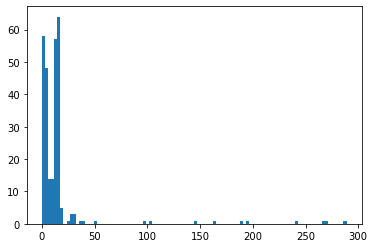

In [15]:
plt.hist(df["distance_Km"], bins=100);
print("the mean of 16km is in the bulk of the distrubtion but we have a very long tail of much longer trips. ")

the mean of 21min is in the bulk of the distrubtion but we have a very long tail of much longer trips. 


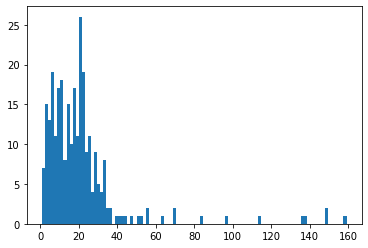

In [16]:
plt.hist(df["duration_H"]*60, bins=100);
print("the mean of 21min is in the bulk of the distrubtion but we have a very long tail of much longer trips. ")

### 2. Distributions (6 pts)

 - plot the histogram of the traveled distances

Text(0, 0.5, 'counts per bin')

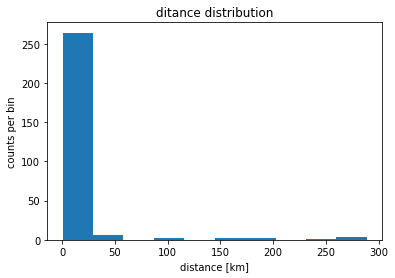

In [21]:
plt.hist(df["distance_Km"]);
plt.title("ditance distribution")
plt.xlabel('distance [km]')
plt.ylabel('counts per bin')

 - plot the histogram of the travel durations

Text(0, 0.5, 'counts per bin')

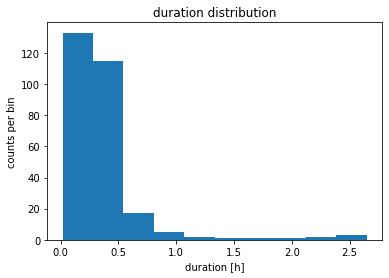

In [22]:
plt.hist(df["duration_H"]);
plt.title("duration distribution")
plt.xlabel('duration [h]')
plt.ylabel('counts per bin')

 - compute the distance $D$ which satisfies $f_{\text{travels}}(d<D) = 90\%$ (with a precision of 1\%), where $f_{\text{travels}}(d<D)$ is the fraction of travels having a distance below $D$. Improve the histogram of distances using this information.

In [36]:
def getFraction(distance_values, D):
    return sum(distance_values < D) / len(distance_values)
    
    
for D in np.linspace(0, 300, 500000):
    f = getFraction(df['distance_Km'], D)
    if f >=0.9:
        print(D, f)
        break
    

16.700433400866803 0.9


In [38]:
np.quantile(df['distance_Km'], 0.9)

16.709999999999997

Text(0, 0.5, 'counts per bin')

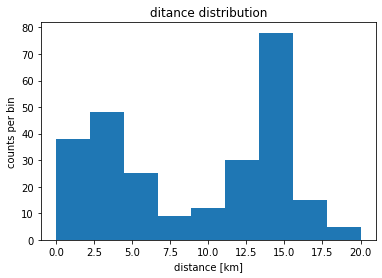

In [42]:
plt.hist(df["distance_Km"], bins=np.linspace(0, 20, 10));
plt.title("ditance distribution")
plt.xlabel('distance [km]')
plt.ylabel('counts per bin')

 - compute the averaged speed for *each travel* (in km/h) and plot the corresponding distribution. Add this information to the original dataframe

(array([38., 75., 90., 58.,  8.,  1.,  4.,  1.,  3.,  2.]),
 array([  6.        ,  18.03157895,  30.06315789,  42.09473684,
         54.12631579,  66.15789474,  78.18947368,  90.22105263,
        102.25263158, 114.28421053, 126.31578947]),
 <BarContainer object of 10 artists>)

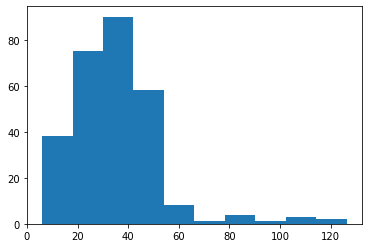

In [41]:
df['speed']= df['distance_Km'] / df['duration_H']

plt.hist(df['speed'])

### 3. Is there a favored time to travel? (2 pts)

Are there some periods of the day (*e.g.* morning or afternoon), some days of the week (*e.g.* sunday or monday), having more travels?

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0., 24., 26., 20., 11., 27., 12.,
         7., 11.,  7., 28., 50., 31., 16.,  6.,  1.,  2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 <BarContainer object of 23 artists>)

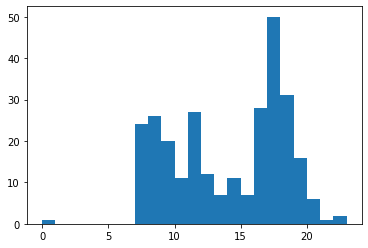

In [47]:
plt.hist(df['dayTime_H'], bins=np.linspace(0,23, 24))

(array([49., 39., 45., 47., 37., 39., 24.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

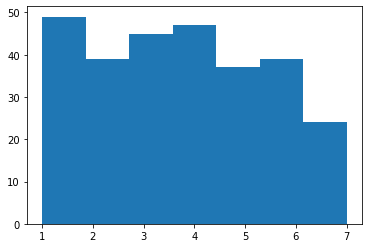

In [52]:
plt.hist(df['weekDay'], bins=np.linspace(1,7,8))

## Part II: consumption analysis (10 pts)

### 1. Typical consumption values (2 pts)

What are the minimum, mean and maximum consumptions?

In [55]:
conso = df["conso_L100km"]
mean_conso =  np.mean(conso)
max_conso = np.max(conso)
min_conso = np.min(conso)

print('the mean; max and min are', mean_conso, max_conso, min_conso)

the mean; max and min are 5.8725000000000005 11.7 3.6


In [58]:
df["conso_L100km"].min() # an alternative equivalent method

3.6

### 2.  Distributions (8 pts)

 - Plot the distribution of the consumption.

(array([19., 84., 81., 47., 20., 12.,  6.,  6.,  3.,  2.]),
 array([ 3.6 ,  4.41,  5.22,  6.03,  6.84,  7.65,  8.46,  9.27, 10.08,
        10.89, 11.7 ]),
 <BarContainer object of 10 artists>)

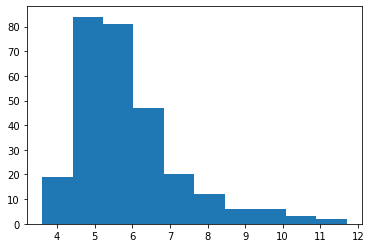

In [56]:
plt.hist(conso)

 - How this distribution changes when a sub-set of travels (*e.g.* long, short, fast slow, ...) is selected?

In [70]:
fast_mask = df["speed"] > 60
fast_conso = conso[fast_mask]
slow_mask = df["speed"] < 60
slow_conso = conso[slow_mask]

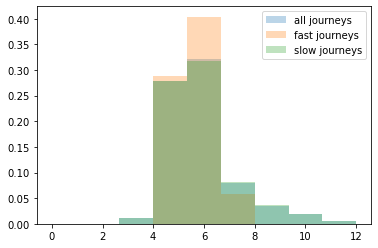

In [76]:

binning = np.linspace(0, 12, 10)
plt.hist(conso, label='all journeys', alpha=0.3, bins=binning, density=1)
plt.hist(fast_conso, label='fast journeys', alpha=0.3, bins=binning, density=1)
plt.hist(slow_conso, label='slow journeys', alpha=0.3, bins=binning, density=1)
plt.legend();

 - According to you, is the maximum consumption found above representative?

In [78]:
long_mask = df["distance_Km"] > 100
long_conso = conso[long_mask]
short_mask = df["distance_Km"] < 60
short_conso = conso[short_mask]

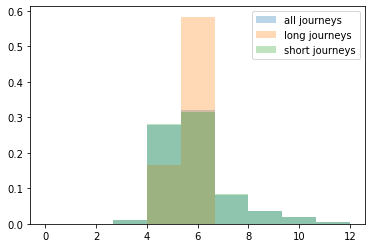

In [79]:
binning = np.linspace(0, 12, 10)
plt.hist(conso, label='all journeys', alpha=0.3, bins=binning, density=1)
plt.hist(long_conso, label='long journeys', alpha=0.3, bins=binning, density=1)
plt.hist(short_conso, label='short journeys', alpha=0.3, bins=binning, density=1)
plt.legend();

 + Can you isolate types of travels having a generally lower consumption?

Text(0, 0.5, 'duration')

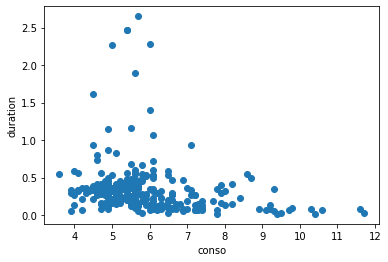

In [81]:
plt.scatter(conso, df['duration_H'])
plt.xlabel('conso')
plt.ylabel('duration')

Text(0, 0.5, 'speed')

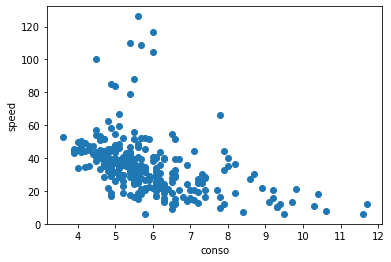

In [82]:
plt.scatter(conso, df['speed'])
plt.xlabel('conso')
plt.ylabel('speed')

(0.0, 20.0)

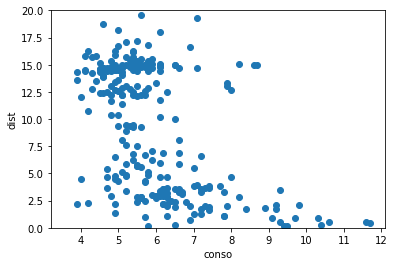

In [85]:
plt.scatter(conso, df['distance_Km'])
plt.xlabel('conso')
plt.ylabel('dist')

plt.ylim(0,20)

Text(0, 0.5, 'month')

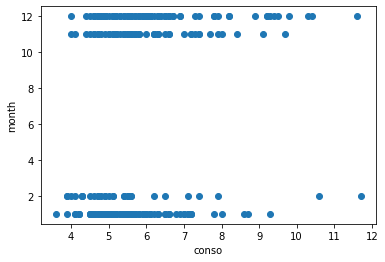

In [86]:
plt.scatter(conso, df['yearMonth'])
plt.xlabel('conso')
plt.ylabel('month')